In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [3]:
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot

In [4]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

# Tunning Model

In [22]:
param = []

for criterion in ('gini', 'entropy'):
    for splitter in ('best', 'random'):
        for max_depth in range (1,20):
            model = tree.DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
            result = training(X_train, X_test, Y_train, Y_test, model)
            print(criterion,splitter, max_depth)
            print(result['test_score'])
            print(result['train_score'])
            print()
            param.append((result['test_score'],result['train_score'],criterion,splitter, max_depth))

gini best 1
0.6495406016544066
0.6653279761039553

gini best 2
0.7335042361965824
0.7408936683536562

gini best 3
0.7618109024816098
0.7692763091632777

gini best 4
0.7668031027277672
0.7842631238539138

gini best 5
0.7749728081976128
0.800292219779995

gini best 6
0.7772971706214042
0.8101163654749963

gini best 7
0.7786374402495921
0.8193311764703329

gini best 8
0.768679873772791
0.8316442993042724

gini best 9
0.7618838910038069
0.8476494092726925

gini best 10
0.7565763016286459
0.8655381936056499

gini best 11
0.7424888012708591
0.8835628184121603

gini best 12
0.7253699516272145
0.90264574935821

gini best 13
0.7146765964450296
0.9201898326358103

gini best 14
0.6948339153333142
0.9373550862668673

gini best 15
0.6744890803446204
0.9539392743626457

gini best 16
0.6598013925065118
0.9673881665574848

gini best 17
0.6514578026161377
0.9771343007806652

gini best 18
0.639271939491084
0.9846234363411427

gini best 19
0.6423379941036724
0.990051230122123

gini random 1
0.62769628187

In [23]:
param.sort()
param[::-1]

[(0.7805415819904399, 0.8186610430789398, 'entropy', 'best', 7),
 (0.7786374402495921, 0.8193311764703329, 'gini', 'best', 7),
 (0.778325986776197, 0.8097565418444284, 'entropy', 'best', 6),
 (0.7775213240976615, 0.8435957938498772, 'entropy', 'best', 9),
 (0.7772971706214042, 0.8101163654749963, 'gini', 'best', 6),
 (0.776242772705155, 0.8303282926043777, 'entropy', 'best', 8),
 (0.7754651229355699, 0.7996013099805136, 'entropy', 'best', 5),
 (0.7749728081976128, 0.800292219779995, 'gini', 'best', 5),
 (0.7688632395454676, 0.7983111510054697, 'gini', 'random', 7),
 (0.768679873772791, 0.8316442993042724, 'gini', 'best', 8),
 (0.7678213641697913, 0.7841823254422502, 'entropy', 'best', 4),
 (0.7672610699258665, 0.8095570586298815, 'entropy', 'random', 8),
 (0.7668031027277672, 0.7842631238539138, 'gini', 'best', 4),
 (0.7663301084809802, 0.8306992754162004, 'entropy', 'random', 10),
 (0.7660603371783496, 0.8599641425923609, 'entropy', 'best', 10),
 (0.7652295560580472, 0.845477469384609

# Importance feature

test_score:  0.778255323868678
train_score:  0.8186610430789398
city_development_index
Feature: 0, Score: 0.48155
gender
Feature: 1, Score: 0.00208
relevent_experience
Feature: 2, Score: 0.01020
enrolled_university
Feature: 3, Score: 0.01098
education_level
Feature: 4, Score: 0.06311
experience
Feature: 5, Score: 0.03218
company_size
Feature: 6, Score: 0.17896
last_new_job
Feature: 7, Score: 0.02359
training_hours
Feature: 8, Score: 0.03369
major_Arts
Feature: 9, Score: 0.00093
major_Business Degree
Feature: 10, Score: 0.00135
major_Humanities
Feature: 11, Score: 0.00000
major_No Major
Feature: 12, Score: 0.00000
major_Other
Feature: 13, Score: 0.00000
major_STEM
Feature: 14, Score: 0.00119
company_type_Early Stage Startup
Feature: 15, Score: 0.00320
company_type_Funded Startup
Feature: 16, Score: 0.00247
company_type_NGO
Feature: 17, Score: 0.00206
company_type_Other
Feature: 18, Score: 0.00143
company_type_Public Sector
Feature: 19, Score: 0.00288
company_type_Pvt Ltd
Feature: 20, Sc

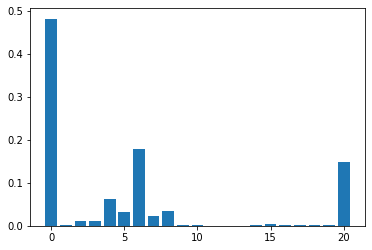

In [32]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 7)
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])
importance = model.feature_importances_

for i,v in enumerate(importance):
    print(X_train.columns[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Scoring Model

In [33]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.7849016464548901


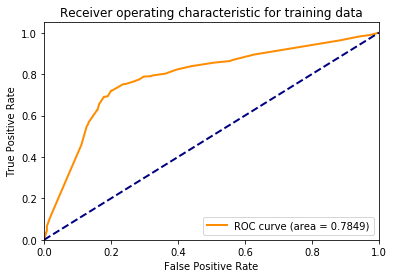

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()

[Text(145.37708333333336, 203.85, 'X[0] <= 0.625\nentropy = 0.808\nsamples = 15326\nvalue = [11529, 3797]'),
 Text(65.48750000000001, 176.67000000000002, 'X[5] <= 1.5\nentropy = 0.976\nsamples = 2755\nvalue = [1128, 1627]'),
 Text(32.03333333333334, 149.49, 'X[2] <= 0.5\nentropy = 0.92\nsamples = 358\nvalue = [120, 238]'),
 Text(18.6, 122.31, 'X[8] <= 55.5\nentropy = 0.971\nsamples = 200\nvalue = [80, 120]'),
 Text(10.333333333333334, 95.13, 'X[8] <= 30.5\nentropy = 0.991\nsamples = 119\nvalue = [53, 66]'),
 Text(6.200000000000001, 67.94999999999999, 'X[7] <= 4.0\nentropy = 0.928\nsamples = 70\nvalue = [24, 46]'),
 Text(4.133333333333334, 40.77000000000001, 'X[8] <= 12.5\nentropy = 0.908\nsamples = 68\nvalue = [22, 46]'),
 Text(2.066666666666667, 13.590000000000003, 'entropy = 1.0\nsamples = 20\nvalue = [10, 10]'),
 Text(6.200000000000001, 13.590000000000003, 'entropy = 0.811\nsamples = 48\nvalue = [12, 36]'),
 Text(8.266666666666667, 40.77000000000001, 'entropy = 0.0\nsamples = 2\nval

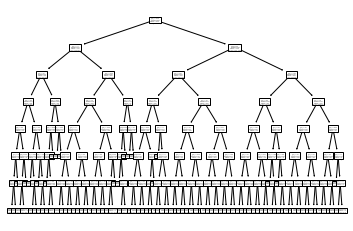

In [35]:
tree.plot_tree(model) 